### __Singular value decomposition (SVD)__

1. We start with the matrix __A__ of size __m x n__
2. We decompose the matrix __A__ into the product of __three__ other matrices:
   
   <br>

   1. __U__ matrix: orthogonal basis for column space of __A__, __m x m__
   2. $\sum$ matrix: singular values of __A__, __m x n__ (diagonal matrix; a little bit like eigenvalues )
   3. $V^T$ matrix: orthogonal basis for row space of __A__, __n x n__
   
<br>

__U__ and $V^T$ are a little bit like eigenvectors - they identify important __features__ (or __'patterns'__) of matrix A.

  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display, Math
from PIL import Image

In [4]:
einstein = Image.open('einstein.jpg')

# The shape of the image means 405 rows (pixels?) by 314 cols (pixels) and 3 is for RGB.
# Seems like we have a "cube" array of numbers and each pixel has its three rgb values
np.shape(einstein)

(405, 314, 3)

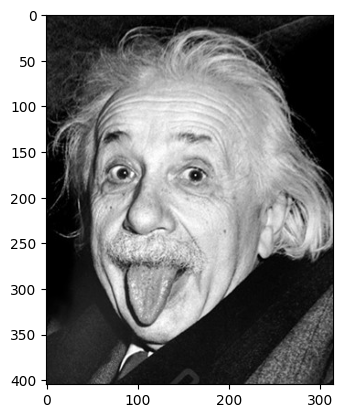

In [5]:
# we can view the image like this

plt.imshow(einstein)
plt.show()

<b>NB: Singular value decomposition (SVD) is built for working with 2D matrices, not with cubes of data (or "tensors").
If we want to decompose cubes, or tensors of data, we need to use another methods.</b>

<br>

In our case we need to get rid of the last - 3rd - dimension. We'll do this by averaging the RGB values into one value, it is the mean of 3 values.

(405, 314)


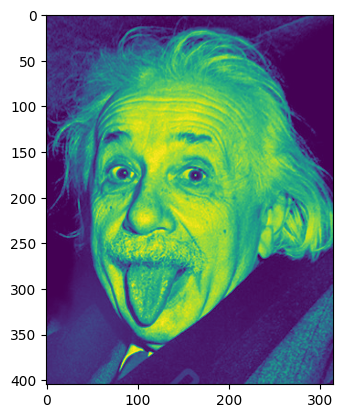

In [6]:
einstein_2d = np.mean(einstein, 2) #averaging by the 3rd dimension, RGB
print(np.shape(einstein_2d))

plt.imshow(einstein_2d)
plt.show()


In [7]:
# Now let's perform SVD operation

U, sigma, V = np.linalg.svd(einstein_2d)

print(np.shape(U))
print(np.shape(sigma))
print(np.shape(V))

(405, 405)
(314,)
(314, 314)


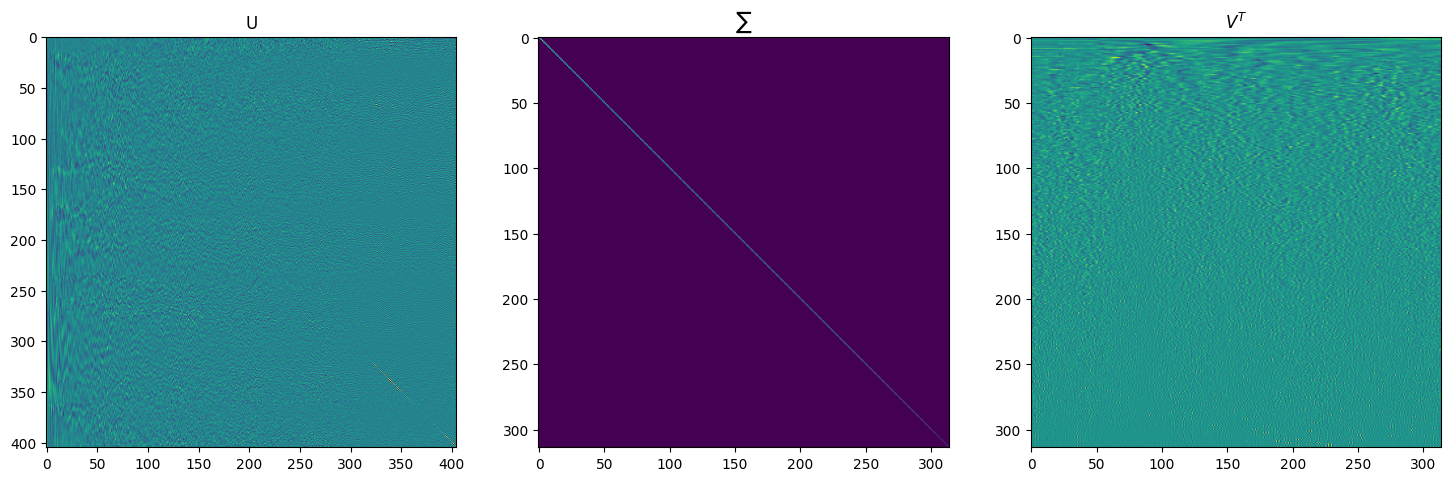

In [8]:
fig, ax = plt.subplots(1, 3)

ax[0].imshow(U)
ax[0].set_title('U')

ax[1].imshow(np.diag(np.log(sigma))) # we use log so the small and big numbers ar on the same scale and visible b
ax[1].set_title('$\sum$')

ax[2].imshow(V)
ax[2].set_title('$V^T$')

plt.gcf().set_size_inches(18, 10)
plt.show()

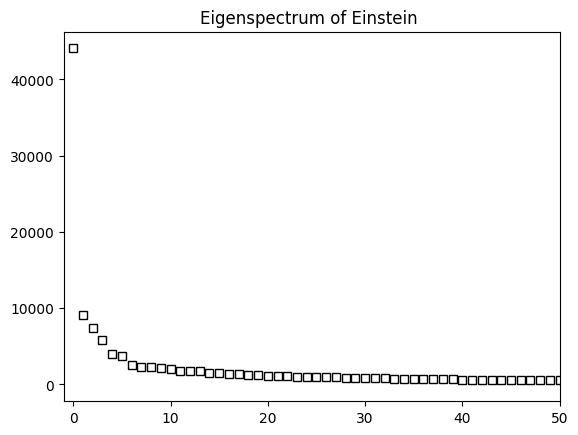

In [9]:
# Let's explore sigma a little bit
# Most of the sigmas are tiny and there are few that are big and one which is huge  

plt.plot(sigma, 'ks', markerfacecolor='w')
plt.xlim([-1, 50])
plt.title('Eigenspectrum of Einstein ')
plt.show()

#### __Super important notes on SVD and__ $\sum$
What this eigenspectrum of an image tells us is that there's one superimportant "feature" of an image and there's a dozen quite important other features. And all other featrues are not that important -- they don't take a lot of variance in the picture.
This ability of SVD (and eigenvector decomposition) to identify important features that are distributed across the matrix, across the dataset is why it is so important operation  in machine learning and AI. 
We'll use this SVD in the next exercise to reconstruct the image of an Einstein (wow!)

### __Exercise__

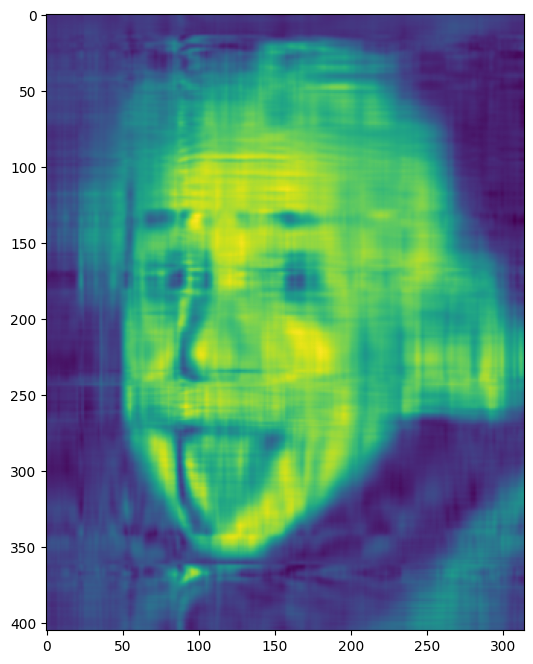

In [41]:
# Let's take care of the sigma_matrix
U, sigma, V = np.linalg.svd(einstein_2d)

sigma_r = np.shape(einstein_2d)[0]
sigma_c = np.shape(einstein_2d)[1]
sigma_rows = np.shape(sigma)[0]

sigma_matrix = np.zeros((sigma_r, sigma_c))

# the second part of the exercise, we can shuffle all the singular values and get the noise
shuffle_sigma = False
if shuffle_sigma:
    np.random.shuffle(sigma)

# the 3rd part: partial reconstruction
partial_reconstruct=True
limit = 10
if partial_reconstruct:
    sigma_rows = limit

for r in range(sigma_r):
    for c in range(sigma_c):
        if r < sigma_rows and c < sigma_rows and r == c:
            sigma_matrix[r, c] = sigma[r]

# Let's reconstruct the Einstien image

einstein_revival = U @ sigma_matrix @ V

plt.imshow(einstein_revival)
plt.gcf().set_size_inches(13, 8)
plt.show()


It is __unreal__! that if we take only 1-2-3-5 first singular values we get the distorted image. We don't need the full singular values matrix to understand what's on our image. Unbelievable, amazing!

### __Below is auxillary test function__

In [10]:
# Testing the function that fills the diagonal with zeros and recreates the
a = np.array([1,2,3,4,5])
sigma_r = 15
sigma_c = 15
sigma_rows = np.shape(a)[0]

sigma_matrix = np.zeros((sigma_r, sigma_c))

for r in range(sigma_r):
    for c in range(sigma_c):
        if r < sigma_rows and c < sigma_rows and r == c:
            sigma_matrix[r, c] = a[r]

display(Math(sym.latex(sym.sympify(sigma_matrix))))

<IPython.core.display.Math object>